In [1]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.DataFrame({
    'x':[12,90,34,54,48,76,57,69,72,84,76,84,92,35,4,9],
    'y':[12,54,37,88,38,95,74,7,83,10,3,4,78,96,45,69]
})

In [3]:
nm.random.seed(200)
k=3 # cluster are 3 

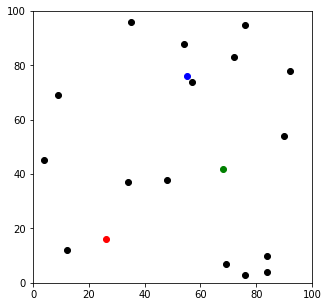

In [4]:
#centroid[i]=[x,y] choosing 1st centroid randomly between 0 to 100,bcoz x and y value lies between 0 to 100
centroid={
    i+1:[nm.random.randint(0,100),nm.random.randint(0,100)]
    for i in range(k) 
    #i iterate upto 3
}
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k') 
# scatter plot draw having x axis is x datsetand y axis having y dataset and k is 3(cluster value are 3) 
colmap={1: 'r', 2: 'g', 3: 'b'} 
# 1st cluster for red colour 2nd cluster gives green color,3rd cluster gives blue color
for i in centroid.keys():
    plt.scatter(*centroid[i],color=colmap[i])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()
    


C:\Program Files\anaconda2\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


    x   y  distance_from_1  closest color
0  12  12        14.560220        1     r
1  90  54        74.431176        1     r
2  34  37        22.472205        1     r
3  54  88        77.252832        1     r
4  48  38        31.112698        1     r


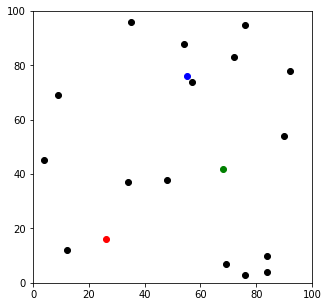

In [5]:
# assignment stage #choosing correct cluster on the basis of difference between each cluster centroid point and new datapoint and which difference are small those cluster are selected
def assignment(df,centroid):
    for i in centroid.keys():
        #sqrt((x1-x2)^2.(y1-y2)^2)
        df['distance_from_{}'.format(i)]=(
            nm.sqrt(
                (df['x']-centroid[i][0])**2
                +(df['y']-centroid[i][1])**2
                
            )
        )
        centroid_distance_cols=['distance_from_{}'.format(i)for i in centroid.keys()]
        df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
        df['closest']=df['closest'].map(lambda x:int(x.lstrip('distance_from_')))
        df['color']=df['closest'].map(lambda x:colmap[x])
        return df
df=assignment(df,centroid)
print(df.head())
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k') 
colmap={1: 'r', 2: 'g', 3: 'b'} 
for i in centroid.keys():
    plt.scatter(*centroid[i],color=colmap[i])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

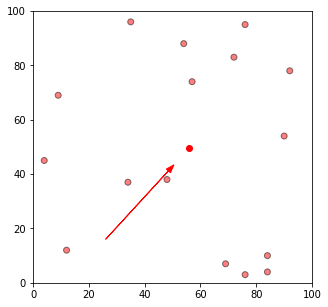

In [6]:
#update stage centrid are updated
import copy
old_centroid=copy.deepcopy(centroid)
def update(k):
    for i in centroid.keys():
        centroid[i][0]=nm.mean(df[df['closest']==i]['x'])
        centroid[i][1]=nm.mean(df[df['closest']==i]['y'])
    return k
centroid=update(centroid)
fig=plt.figure(figsize=(5,5))
ax=plt.axes()
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i],color=colmap[i])
plt.xlim(0,100)
plt.ylim(0,100)
for i in old_centroid.keys():
    old_x=old_centroid[i][0]
    old_y=old_centroid[i][1]
    dx=(centroid[i][0]-old_centroid[i][0])*0.75
    dy=(centroid[i][1]-old_centroid[i][1])*0.75
    ax.arrow(old_x,old_y,dx,dy,head_width=2,head_length=3,fc=colmap[i],ec=colmap[i])
plt.show()

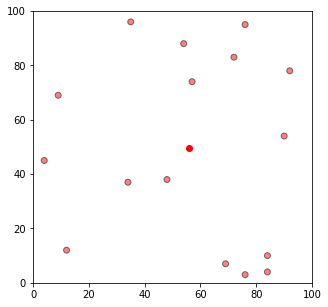

In [7]:
#repeat assignment stage
df=assignment(df,centroid)
#plot retults
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroid.keys():
    plt.scatter(*centroid[i],color=colmap[i])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

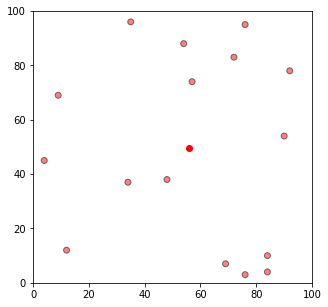

In [8]:
#continoue until all  assigned categories dont change  any more #centroid are put  center position 
while True:
    closest_centroid=df['closest'].copy(deep=True)
    centroid=update(centroid)
    df=assignment(df,centroid)
    if closest_centroid.equals(df['closest']):
        break
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroid.keys():
     plt.scatter(*centroid[i],color=colmap[i])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [9]:
#dataframe define to k_mean
df=pd.DataFrame({
    'x':[12,90,34,54,48,76,57,69,72,84,76,84,92,35,4,9],
    'y':[12,54,37,88,38,95,74,7,83,10,3,4,78,96,45,69]
})
from sklearn.cluster import KMeans#k_mean is preddefinelibrary whic are come under sklearn
Kmeans=KMeans(n_clusters=3)#cluster are 3
Kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
labels=Kmeans.predict(df)
centroid=Kmeans.cluster_centers_

NameError: name 'centriods' is not defined

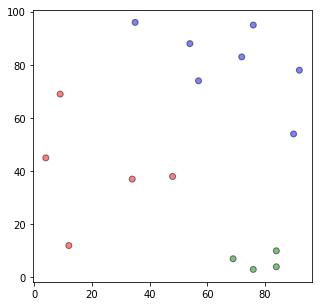

In [12]:
fig=plt.figure(figsize=(5,5))
colors=map(lambda x:colmap[x+1],labels)
colors1=list(colors)
plt.scatter(df['x'],df['y'],color=colors1,alpha=0.5,edgecolor='k')
for idx,centroid in enumerate (centriods):
    plt.scatter(*centroid,color=colmap[idx+1])
plt.xlim(0,100)
plt.ylim(0,100)
plt.show